In [1]:
import cv2
import os
import warnings
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

from skimage import io
from scipy.signal import convolve2d 

warnings.filterwarnings('ignore')

In [2]:
# establish a folder named LAB4
path = "LAB4"
if not os.path.isdir(path):
    os.mkdir(path)

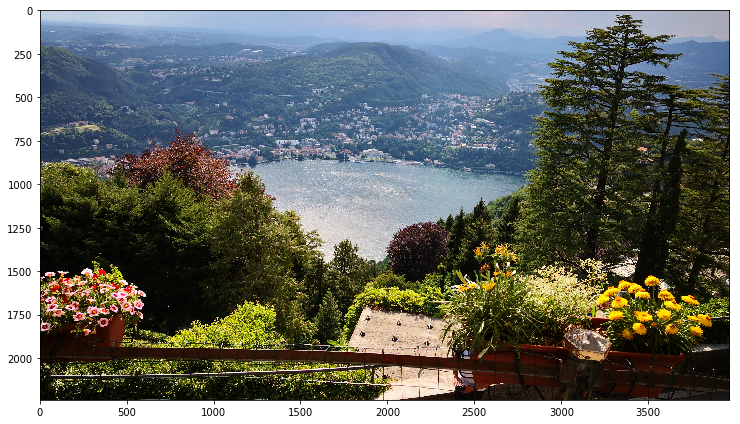

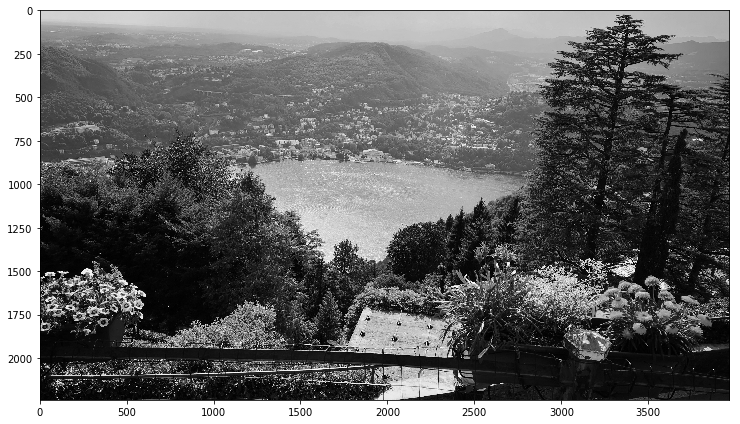

In [3]:
# show the RGB picture
imgRGB = io.imread('lake.jpg')
plt.figure(figsize=(15,6)) 
io.imshow(imgRGB)

# show the gray picture
imgGray = cv2.cvtColor(imgRGB,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,6)) 
io.imshow(imgGray, cmap = 'gray')

In [4]:
def Kuwahara(original, winsize):
    image = original.astype(np.float64)
    # make sure window size is correct
    if winsize %4 != 1:
        raise Exception ("Invalid winsize %s: winsize must follow formula: w = 4*n+1." %winsize)
        
    #Build subwindows
    tmpAvgKerRow = np.hstack((np.ones((1,(winsize-1)//2+1)),np.zeros((1,(winsize-1)//2))))
    tmpPadder = np.zeros((1,winsize))
    tmpavgker = np.tile(tmpAvgKerRow, ((winsize-1)//2+1,1))
    tmpavgker = np.vstack((tmpavgker, np.tile(tmpPadder, ((winsize-1)//2,1))))
    tmpavgker = tmpavgker/np.sum(tmpavgker)
    
    # tmpavgker is a 'north-west' subwindow (marked as 'a' above)
    # we build a vector of convolution kernels for computing average and
    # variance
    avgker = np.empty((4,winsize,winsize)) # make an empty vector of arrays
    avgker[0] = tmpavgker # North-west (a)
    avgker[1] = np.fliplr(tmpavgker) # North-east (b)
    avgker[2] = np.flipud(tmpavgker) # South-west (c)
    avgker[3] = np.fliplr(avgker[2]) # South-east (d)
    
    # Create a pixel-by-pixel square of the image
    squaredImg = image**2 
    
    # preallocate these arrays to make it apparently %15 faster
    avgs = np.zeros([4, image.shape[0],image.shape[1]])
    stddevs = avgs.copy()
    
    # Calculation of averages and variances on subwindows
    for k in range(4):
        # mean on subwindow
        avgs[k] = convolve2d(image, avgker[k],mode='same')
        # mean of squares on subwindow
        stddevs[k] = convolve2d(squaredImg, avgker[k],mode='same')
        # variance on subwindow
        stddevs[k] = stddevs[k]-avgs[k]**2
    # Choice of index with minimum variance
    indices = np.argmin(stddevs,0) # returns index of subwindow with smallest variance
    
    # Building the filtered image (with nested for loops)
    filtered = np.zeros(original.shape)
    for row in range(original.shape[0]):
        for col in range(original.shape[1]):
            filtered[row,col] = avgs[indices[row,col], row,col]
            
    #filtered=filtered.astype(np.uint8)
    return filtered.astype(np.uint8)

In [5]:
# Kuwahara filter 25*25
area = 25
imgNormalKuwahara = Kuwahara(imgGray,area)

In [6]:
# Kuwahara filter 9*9
area = 9
imgNormalKuwahara99 = Kuwahara(imgGray,area)

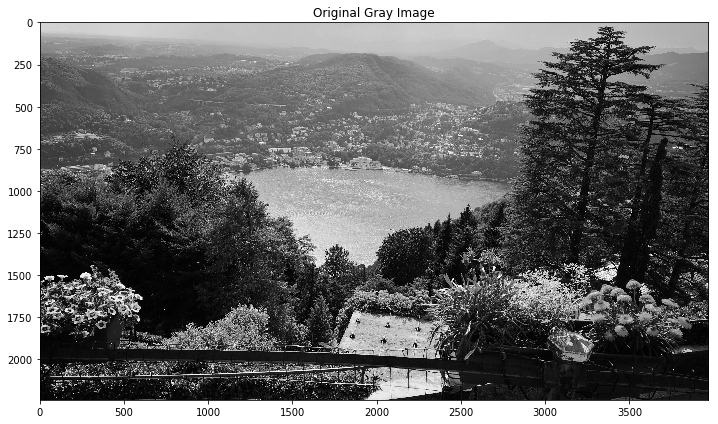

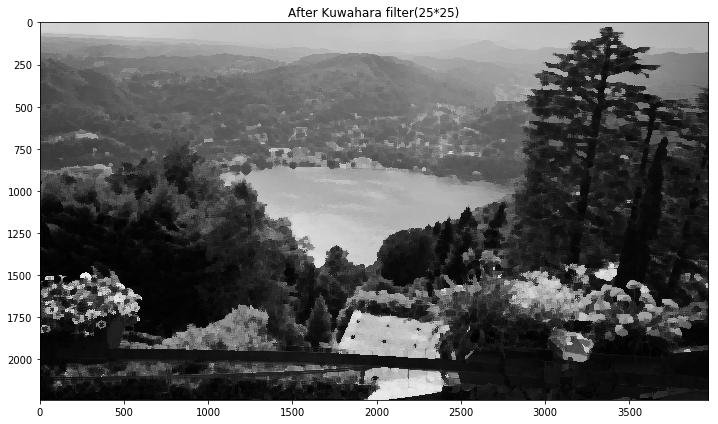

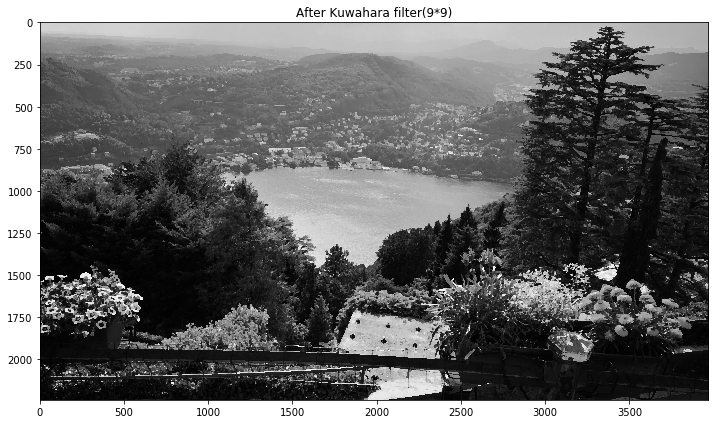

In [7]:
# plot the original Kuwahara image
plt.figure(figsize=(15,6)) 
plt.title("Original Gray Image")
io.imshow(imgGray/255)

plt.figure(figsize=(15,6)) 
plt.title("After Kuwahara filter(25*25)")
io.imshow(imgNormalKuwahara/255)
plt.show()

plt.figure(figsize=(15,6)) 
plt.title("After Kuwahara filter(9*9)")
io.imshow(imgNormalKuwahara99/255)
plt.show()

In [8]:
def KuwaharaAnother(original, winsize):
    image = original.astype(np.float64)
    # make sure window size is correct
    if winsize %4 != 1:
        raise Exception ("Invalid winsize %s: winsize must follow formula: w = 4*n+1." %winsize)
        
    # Build subwindows
    tmpAvgKerRow = np.hstack((np.ones((1,(winsize-1)//2+1)),np.zeros((1,(winsize-1)//2))))
    tmpPadder = np.zeros((1,winsize))
    tmpavgker = np.tile(tmpAvgKerRow, ((winsize-1)//2+1,1))
    tmpavgker = np.vstack((tmpavgker, np.tile(tmpPadder, ((winsize-1)//2,1))))
    tmpavgker = tmpavgker/np.sum(tmpavgker)
    
    ### Change neighborhood
    for i in range(0,winsize-1):
        for j in range(0,winsize-1):
            if not i==j:
                tmpavgker[i][j] = 0
    
    # tmpavgker is a 'north-west' subwindow (marked as 'a' above)
    # we build a vector of convolution kernels for computing average and
    # variance
    avgker = np.empty((4,winsize,winsize)) # make an empty vector of arrays
    
    avgker[0] = tmpavgker # North-west (a) 
    avgker[1] = np.fliplr(tmpavgker) # North-east (b)
    avgker[2] = np.flipud(tmpavgker) # South-west (c)
    avgker[3] = np.fliplr(avgker[2]) # South-east (d)
    
    # Create a pixel-by-pixel square of the image
    squaredImg = image**2 
    
    # preallocate these arrays to make it apparently %15 faster
    avgs = np.zeros([4, image.shape[0],image.shape[1]])
    stddevs = avgs.copy()
    
    # Calculation of averages and variances on subwindows
    for k in range(4):
        # mean on subwindow
        avgs[k] = convolve2d(image, avgker[k],mode='same')
        # mean of squares on subwindow
        stddevs[k] = convolve2d(squaredImg, avgker[k],mode='same')
        # variance on subwindow
        stddevs[k] = stddevs[k]-avgs[k]**2
    # Choice of index with minimum variance
    indices = np.argmin(stddevs,0) # returns index of subwindow with smallest variance
    
    # Building the filtered image (with nested for loops)
    filtered = np.zeros(original.shape)
    for row in range(original.shape[0]):
        for col in range(original.shape[1]):
            filtered[row,col] = avgs[indices[row,col], row,col]
            
    #filtered=filtered.astype(np.uint8)
    return filtered.astype(np.uint8)

In [9]:
# Abnormal Kuwahara filter 25*25
area = 25
imgAnotherKuwahara = KuwaharaAnother(imgGray,area)

In [10]:
# Abnormal Kuwahara filter 9*9
area = 9
imgAnotherKuwahara99 = KuwaharaAnother(imgGray,area)

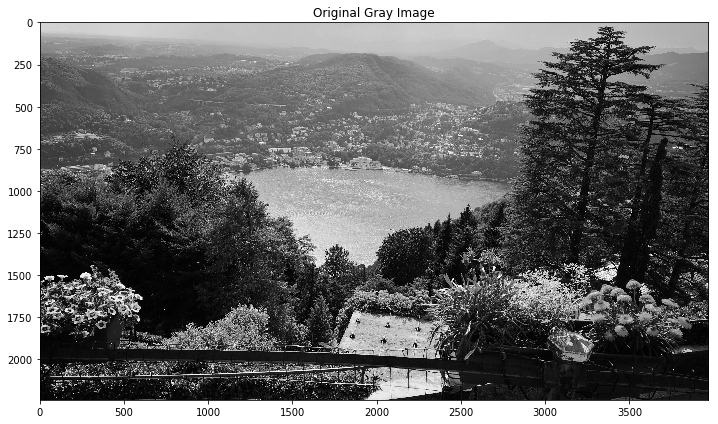

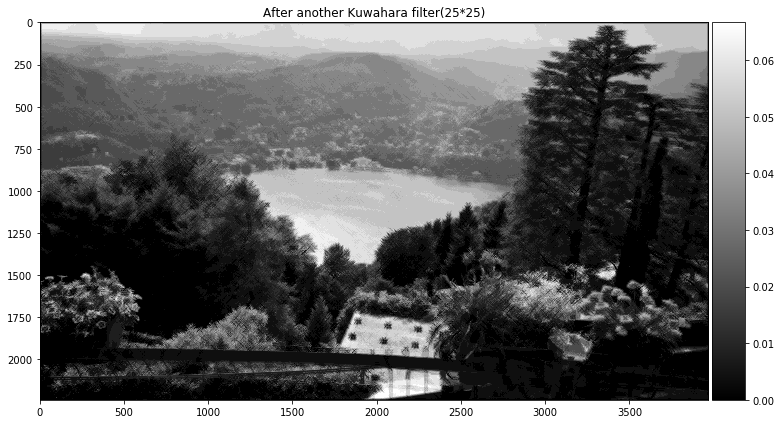

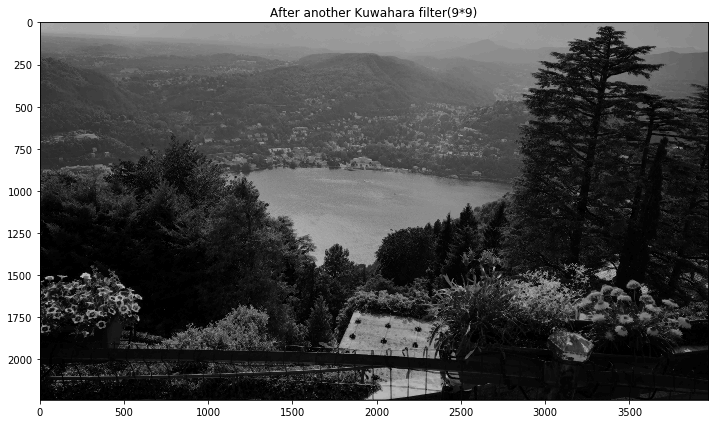

In [11]:
# plot the another Kuwahara image
plt.figure(figsize=(15,6)) 
plt.title("Original Gray Image")
io.imshow(imgGray/255)

plt.figure(figsize=(15,6)) 
plt.title("After another Kuwahara filter(25*25)")
io.imshow(imgAnotherKuwahara/255, cmap = 'gray')
plt.show()

plt.figure(figsize=(15,6)) 
plt.title("After another Kuwahara filter(9*9)")
io.imshow(imgAnotherKuwahara99*4)
plt.show()

In [12]:
img = np.array([[2, 2, 211, 2, 5, 50, 50, 5],
                [118, 2, 202, 2, 50, 50, 5, 5],
                [2, 116, 2, 20, 50, 5, 5, 0],
                [2, 116, 20, 20, 53, 5, 253, 5],
                [2, 255, 20, 20, 48, 5,255, 255],
                [2, 2, 20, 20, 50, 50, 0, 255],
                [2, 17, 20, 20, 50, 50, 5, 0],
                [16, 2, 2, 2, 50, 50, 50, 50]])
winsize = 9
tmpAvgKerRow = np.hstack((np.ones((1,(winsize-1)//2+1)),np.zeros((1,(winsize-1)//2))))
tmpPadder = np.zeros((1,winsize))
tmpavgker = np.tile(tmpAvgKerRow, ((winsize-1)//2+1,1))
tmpavgker = np.vstack((tmpavgker, np.tile(tmpPadder, ((winsize-1)//2,1))))
tmpavgker = tmpavgker/np.sum(tmpavgker)
for i in range(0,winsize-1):
    for j in range(0,winsize-1):
        if not i==j:
            tmpavgker[i][j] = 0
    
avgker = np.empty((4,winsize,winsize)) # make an empty vector of arrays
    
avgker[0] = tmpavgker # North-west (a) 
avgker[1] = np.fliplr(tmpavgker) # North-east (b)
avgker[2] = np.flipud(tmpavgker) # South-west (c)
avgker[3] = np.fliplr(avgker[2]) # South-east (d)

print(tmpAvgKerRow)
print("\n")
print(tmpPadder)
print("\n")
print(tmpavgker)
print("\n")
print(avgker)

[[1. 1. 1. 1. 1. 0. 0. 0. 0.]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]


[[0.04 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.04 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.04 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.04 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.04 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


[[[0.04 0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.04 0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.04 0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.04 0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.04 0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]

 [[0.   0.   0.   0.   0.   0.   0.   0.   0.04]
  [0.  